# 4. Evaluating Model.
Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn has 3 different API for evaluating the quality of a model's predictions:
1. **Estimator score method**: score() method provides default evaluation criterion for the problem they are designed to solve. This is embedded in the chosen machile learning estiomator algorithm. Thus each estimator will have their own score() method.
1. **Scoring parameter**: Model evaluation tools using cross validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. 
1. **Metric functions**: The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics. 

Finally, Dummy estimators are useful to get a baseline value of those metrics for random prodictions.

In this session we will try to evaluate the model deeper. One case for classification will use the heart_disease data. The other case for regression will use the Boston Housing data frame. 

## 4.1 Default score() method
This is the method attached to the estimator selected.

In our cases it will be score() methods for the RandomForestClassifier() and RandomForestRegressor() estimators.

In [1]:
import numpy as np, pandas as pd 
# import the heart disease data from csv
heart_df = pd.read_csv('../data/heart-disease.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I think since we already use this data before in previous sessions there are no need to validate the data any more. However, for best practice I will still validate just to see no NaN and Null in the data. 

In [2]:
# check for any Null data inside the df
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
# check for any NaN data in the df
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

All are safe, no null and no NaN values inside the data frame. We can start splitting the dataframe into label data and features data.

In [4]:
heart_y = heart_df['target']
heart_y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
heart_X = heart_df.drop('target', axis=1)
heart_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
# split the data into train and tests
from sklearn.model_selection import train_test_split
# set random seed
np.random.seed(42)
heart_X_train, heart_X_test, heart_y_train, heart_y_test = train_test_split(heart_X, heart_y, test_size=0.2)
(heart_X_train.shape, heart_y_train.shape, heart_X_test.shape, heart_y_test.shape)

((242, 13), (242,), (61, 13), (61,))

Now the split to train and test are done next is to select the model, fit it and then score it. 

For this I directly just select the RandomForestClassifier.

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# fitting the model to the train and test data
rfc.fit(heart_X_train, heart_y_train)
rfc.score(heart_X_test, heart_y_test)

0.8524590163934426

I think it will be better to make the regression process first. This will make it easier as I will explore more model evaluation for classification and regression. Thius the progression of the model evaluation learning will be more seamless.

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
# since boston is a dictionary I need to transform to dataframe.
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Now I need to add the target column to the boston df
boston_df['target'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now as usual as best practice I will check for NaN, and Null but I will make it faster in the form of total of all axis=1.

In [10]:
(boston_df.isna().sum().sum(), boston_df.isnull().sum().sum())

(0, 0)

Okay all data are valid since non NaN and null values inside the boston_df. 

Now we are ready to go on splitting the labelled data y and features data X.

Then split it into train and test data

In [11]:
boston_y = boston_df['target']
boston_X = boston_df.drop('target', axis=1)
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_X, boston_y, test_size=0.2)
# since I already set the random seed above I don't need to set it again here as it is universal for all inside this file
# validate the shape
(boston_X_train.shape, boston_y_train.shape, boston_X_test.shape, boston_y_test.shape)

((404, 13), (404,), (102, 13), (102,))

Okay the shapes of the train test split results are validated.

Now we are ready to fit to the model and score it.

In [12]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(boston_X_train, boston_y_train)
rfr.score(boston_X_test, boston_y_test)

0.8494501439301596

Here the model evaluations are using the model() methods from each estimator. 

NOTE: different estimator will most likely have different score() method algorithm. For instance:

For RandomForestClassifier the score uses mean accuracy while for RandomForestRegressor uses coefficient of determination.

Calling the score() method on any model instance and passing it test data is a good quick way to see how the model is going. However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

## 4.2 Evaluating the model using the scoring parameter
The next step up from using score() is to use custom scoring parameter with cross_val_score() or GridSearchCV.

As you mya have gusessed, the scoring parameter you set will be different depending on the problem you're working on. 

We'll see some specific examples of different parameters in a moment but first let's check out cross_val_score().

We will use the heart_disease data frame and previous random forest classifier estimator we instantiate previously.

In [13]:
from sklearn.model_selection import cross_val_score
# note the random fores classifier is baing instantiated as rfc thus:
cross_val_score(rfc, heart_X, heart_y)

array([0.81967213, 0.86885246, 0.80327869, 0.86666667, 0.78333333])

The result is an array containing five numbers which resembles the score() result from previous scoring using the default random forest classifier estimator.

Just refresher here is the score of the random forest classifier on heart disease model:

In [14]:
rfc.score(heart_X_test, heart_y_test)

0.8524590163934426

The reason why the cross validation result array with 5 numbers is ~~because when building random forest classifier estimator we set the test-size=0.2 which means one fifth of the total data frame total data~~ accroding to [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation is because we **did not specified the CV parameter. Thus it uses its default value and split the sample in 5 folds**.

Let's see their mean:

In [15]:
np.mean(cross_val_score(rfc, heart_X, heart_y))

0.8282513661202187

Basically, to prevent overfitting the best practice is to separate the test and train data. The common practice is the test data is less in amount to train data. 

Unfortunately, there is still chances that the selection of train and test data are not so random. This will lead to other overfitting case. 

Thus in order to make sure this is not happening the model can have cross validation which in return will shift the data along the whole data. This will produce all model and tests for all data.

I think I need to use the same principle on the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation. 

The point to focus on is the CV parameter. This determine the cross validation splitting strategy. This is more than just giving how much splits but it can also determine the starting index and so much more.

The actual name for this setup is K-fold cross validation. I want to test different value of fold. Let's start by 4 fold:

In [16]:
# 4 fold cross validation
cross_val_score(rfc, heart_X, heart_y, cv=4)

array([0.85526316, 0.90789474, 0.80263158, 0.77333333])

In [17]:
#let's see the average
np.mean(cross_val_score(rfc, heart_X, heart_y, cv=4))

0.8083771929824561

Still there is a big gap compared to the score from the rfc. 

Now let's try 5 fold:

In [18]:
cross_val_score(rfc, heart_X, heart_y, cv=5)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.78333333])

In [19]:
# let's see the average
np.mean(cross_val_score(rfc, heart_X, heart_y, cv=5))

0.8116939890710382

The average of the 5 fold is still off from the score. How about 10 fold?

Let's try cv=10:

In [20]:
cross_val_score(rfc, heart_X, heart_y, cv=10)

array([0.87096774, 0.80645161, 0.83870968, 0.93333333, 0.9       ,
       0.76666667, 0.76666667, 0.83333333, 0.73333333, 0.76666667])

In [21]:
# let's see the average
np.mean(cross_val_score(rfc, heart_X, heart_y, cv=10))

0.821505376344086

In [22]:
# just to make sure re seed the random
np.random.seed(42)
# comparison to the estimator (Random Forest Classifier) score
(np.mean(cross_val_score(rfc, heart_X, heart_y, cv=10)), rfc.score(heart_X_test, heart_y_test))

(0.8183870967741935, 0.8524590163934426)

Even as the CV gets higher the mean cross validation score and the estimator score gets closer, but there is still difference between them.

Even the result of the cross validation scores are mostly lower thus their average is lower than estimator score, if you're being asked to give metrics of the model you preferably used the cross validation metrics.

But we haven't use any scoring parameter yet. By default the cross validation scoring parameter is set to None. 

Here is the [Documentation on the scoring parameter for cross validation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

In [23]:
# this is using the default scoring which is None
cross_val_score(rfc, heart_X, heart_y, cv=5, scoring=None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

Now I want to use the cross_val_score method for heart disease data and uses scoring parameter. Let's start with scoring= 'accuracy'. I will use the cv=5 since so far this is the best scoring on cross_val_score method.

In [24]:
cross_val_score(rfc, heart_X, heart_y, cv=5, scoring='accuracy')

array([0.81967213, 0.8852459 , 0.83606557, 0.81666667, 0.76666667])

Let's compare the scoring None vs scoring 'accuracy' results:

In [25]:
(cross_val_score(rfc, heart_X, heart_y, cv=5, scoring=None), cross_val_score(rfc, heart_X, heart_y, cv=5, scoring='accuracy'))

(array([0.85245902, 0.8852459 , 0.80327869, 0.83333333, 0.75      ]),
 array([0.81967213, 0.8852459 , 0.7704918 , 0.78333333, 0.78333333]))

The result is slightly different but not too much. I stil does not understand what is the difference between the default scoring with using accuracy parameter.

### 4.2.1 Classification model evaluation metrics
Four of the main evaluation metrics/methods you'll come acreoss for classification models are:
1. Accuracy
1. Area under ROC curve 
1. Confusion matrix
1. Classification report

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples.

#### Accuracy

Accuracy is the default metric for the score() function within each of Scikit-Learn's classifier models. This is probably the metric you'll see most oftern used for classification problems.

However, we'll see in a second how it always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easiliy convert it into a percentage. We will use Python String interpolation using f-string method. You can search with that keyword for more information.

In [26]:
# accuracy score for the heart disease estimator
# using string interpolation f-string method:
print(f"Heart Disease Classifier (Random Forest Classifier) accuracy: {rfc.score(heart_X_test, heart_y_test)*100:.2f}%")

Heart Disease Classifier (Random Forest Classifier) accuracy: 85.25%


#### Area Under Receiver Operating Characteristic (ROC) Curve

If this one sounds like a mouthful, its because reading the full name is. 

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic of ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true positive rate (tpr) versus false positive rate (fpr).

For clarity:
* True postive: model predicts 1 when truth is 1
* False Positive : model predicts 1 when truth is 0
* True negative : model predicts 0 when truth is 0
* False negative : model predicts 0 when truth is 1

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.

In [28]:
# import
from sklearn.metrics import roc_curve

# we will use probabilities as the y_score of the roc_curve
y_probs = rfc.predict_proba(heart_X_test)
y_probs[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [30]:
# I will only use probabilities for the positive class only
y_probs = y_probs[:,1]
y_probs

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

Positive class means classification that value guess to 1 or positive on having heart disease. This is what index [,1] means since it only took the second probabilities of the whole probabilities.

NOTE: the first proba array [0.89, 0.11] means the first case will have 89% chance of does not have heart disease (class negative) and 11% chance of having heart disease (class positive). We only need the 11% probability value to make the ROC curve.

sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

y_true will use the heart_y_test and y_score will use y_proba for positive class.

In [31]:
# calculate the fpr, tpr, and treshold
fpr, tpr, treshold = roc_curve(heart_y_test, y_probs)

# check the false positive rate:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

Looking at these results on their own doesn't make much sense. It will be much easier to inspecte them visually.

Scikit-Learn does not have a buiilt in function to plot ROC, thus we need matplotlib. 

Often we will need to plot more than one ROC thus it will make sense to make function to plot them and reuse it multiple times later on. 

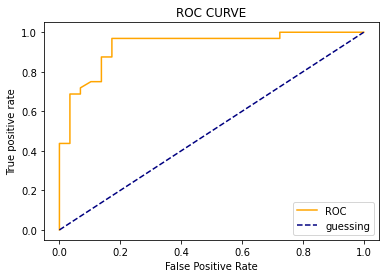

In [32]:
import matplotlib.pyplot as plt 
# I choose pyplot since this is simple single ROC plot and no axis control needed nor complex chart produced

# make the function to plot ROC

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate and true positive rate of a classifier
    The x axis should be the false positive rate (fpr)
    The y axis should be the true positive rate (tpr)
    """
    # plotting the curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plotting the line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='navy', label='guessing', linestyle = '--')
    # customize
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('ROC CURVE')
    plt.legend()
    plt.show()

# now let's test one using the available fpr tpr:
plot_roc_curve(fpr, tpr)


Okay the displayed curve might be confusing.

TLDR; The closer the curve to the top left corner means the model performes well.. 
Thus the closer the curve to the baseline (--) then the model is no better then just guessing.


A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve), Scikit-Learn implements a function to calculate this called [roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

The maximum ROC AUC score is 1.0 and generally, the closer to 1.0 the better the model. Note that AUC = 1.0 must be treated with the grain of salt.

sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [33]:
# find the AUC score
from sklearn.metrics import roc_auc_score

# y_true = heart_y_test, y_score = y_probs
roc_auc_score(heart_y_test, y_probs)

0.9304956896551724

The most ideal position of ROC is in the top left corner of the plot. This would mean that the model predicts only true positive and will result in AUC score of 1.0.

You can simulate this by creating ROC curve and AUC score using only heart_y_test.

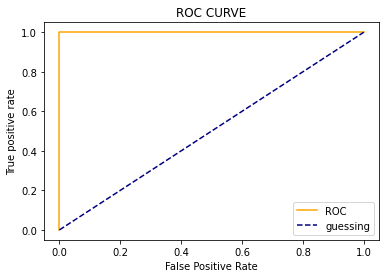

In [34]:
# plot perfect ROC
# produce fpr, tpr from only heart_y_test
fpr_perfect, tpr_perfect, treshold_perfect = roc_curve(heart_y_test, heart_y_test)
plot_roc_curve(fpr_perfect, tpr_perfect)

In [35]:
# perfect AUC score
roc_auc_score(heart_y_test, heart_y_test)

1.0

In reality, a perfect ROC is unlikely.

#### Confusion matrix